In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil import parser
import math
import requests
import json
from scipy import signal
from urllib.parse import urlencode

import resampy

pd.options.plotting.backend = "plotly"

%matplotlib inline

In [44]:
%run functions.ipynb

In [45]:
from_date = '2022-05-04T09:23:00'
to_date = '2022-05-04T19:30:00'

In [46]:
user_id = '5abdb7ad-f973-46ae-b1f1-1bc904885068'
# api_host = 'https://sci-api.appadem.in'
api_host = 'http://host.docker.internal:4000'

# Test 1
activity = 'arm-ergo'
weight = 52
gender = 'male'
watt = 84
injuryLevel = 6

# Test 2
#activity = 'ski-ergo'
#weight = 52
#gender = 'male'
#watt = 18
#injuryLevel = 6

# condition = 'paraplegic'
condition = 'tetraplegic'

In [47]:
query = urlencode({'activity': activity, 'weight': weight, 'gender': gender, 'watt': watt, 'injuryLevel': injuryLevel, 'condition': condition })
query

'activity=arm-ergo&weight=52&gender=male&watt=84&injuryLevel=6&condition=tetraplegic'

In [48]:
# GET energy'
url = api_host + '/users/' + user_id + '/energy?from=' + from_date + '&to=' + to_date + '&' + query
response = requests.get(url).text
energy = json.loads(response)
url

'http://host.docker.internal:4000/users/5abdb7ad-f973-46ae-b1f1-1bc904885068/energy?from=2022-05-04T09:23:00&to=2022-05-04T19:30:00&activity=arm-ergo&weight=52&gender=male&watt=84&injuryLevel=6&condition=tetraplegic'

In [49]:
# GET HR
url = api_host + '/users/' + user_id + '/data/hr?from=' + from_date + '&to=' + to_date
response = requests.get(url).text
hr = json.loads(response)
url

'http://host.docker.internal:4000/users/5abdb7ad-f973-46ae-b1f1-1bc904885068/data/hr?from=2022-05-04T09:23:00&to=2022-05-04T19:30:00'

In [50]:
rows = []
for d in energy:
    rows.append([pd.to_datetime(d['t']), d['energy']])

df = pd.DataFrame(rows, columns=['time', 'value'])

In [51]:
rows = []
for d in hr:
    rows.append([pd.to_datetime(d['t']), d['hr']])

df_hr = pd.DataFrame(rows, columns=['time', 'value'])

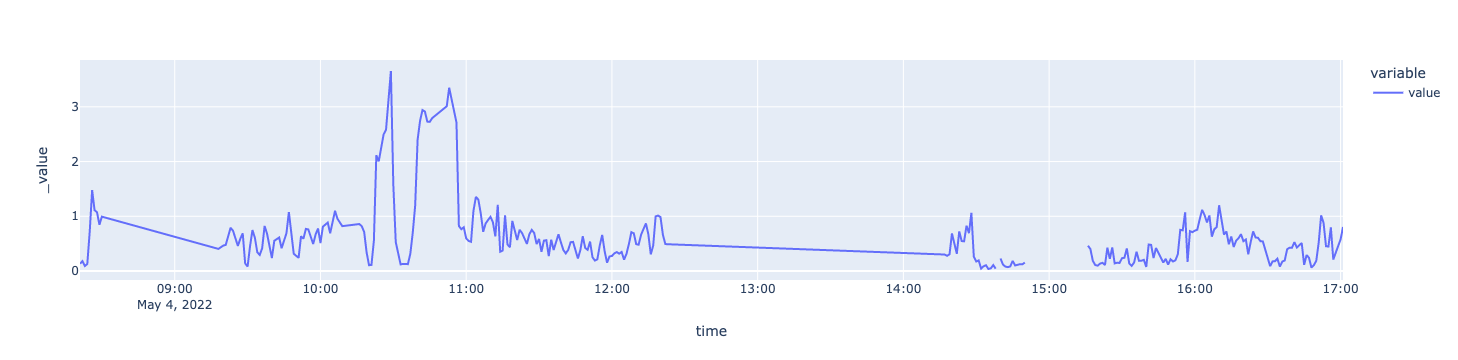

In [52]:
df.set_index('time').plot(y=['value'])

In [53]:
#df.cumsum().plot()

In [64]:
#np.select([
#        (df.series > before_period_start) & (df.series < before_period_end),
#        (df.series > after_period_start) & (df.series < after_period_end)
#    ], ['before', 'after'], default='none')
# Test 1
measure_from = '2022-05-04T10:21:00'
measure_to = '2022-05-04T10:30:00'

# Test 2
#measure_from = '2022-05-04T10:40:00'
#measure_to = '2022-05-04T10:49:00'

filtered = df[df.time > measure_from]
filtered = filtered[filtered.time < measure_to]
filtered = filtered.set_index('time')

In [65]:
filtered_hr = df_hr[df_hr.time > measure_from]
filtered_hr = filtered_hr[filtered_hr.time < measure_to]
filtered_hr = filtered_hr.set_index('time')

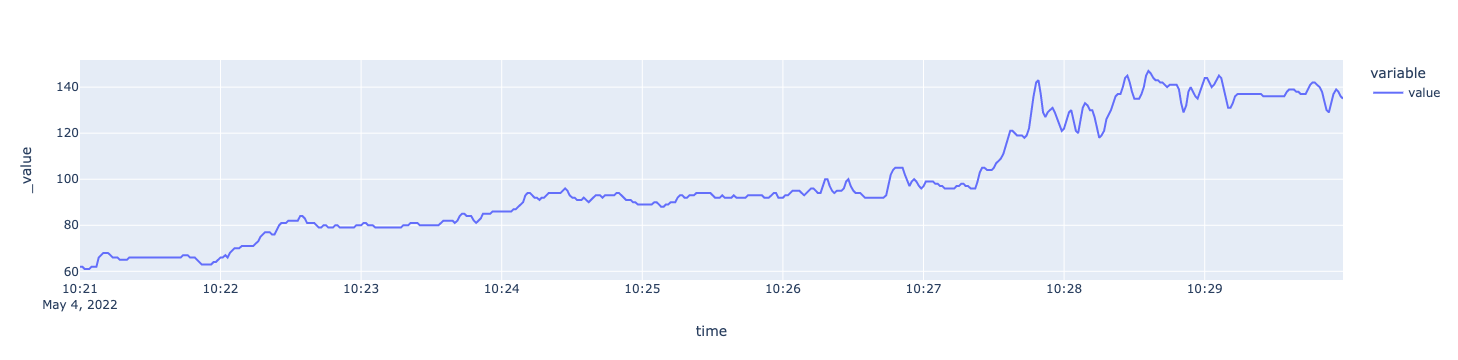

In [66]:
filtered_hr.plot(y=['value'])

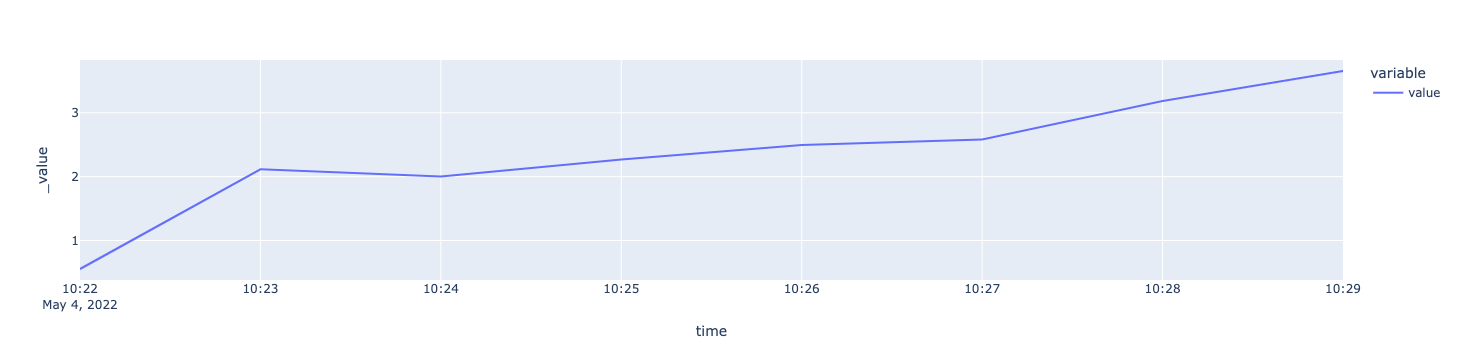

In [67]:
filtered.plot(y=['value'])

In [68]:
filtered.sum()

value    18.85719
dtype: float64

In [69]:
filtered

,value
time,
2022-05-04 10:22:00+00:00,0.553733
2022-05-04 10:23:00+00:00,2.115425
2022-05-04 10:24:00+00:00,2.003900
2022-05-04 10:25:00+00:00,2.267806
2022-05-04 10:26:00+00:00,2.495481
2022-05-04 10:27:00+00:00,2.582774
2022-05-04 10:28:00+00:00,3.183676
2022-05-04 10:29:00+00:00,3.654396


In [60]:
data = [{
    't': "2022-05-04T10:23:00.000Z",
    'energy': 1.695,
},{
    't': "2022-05-04T10:24:00.000Z",
    'energy': 1.741,
    }, {
    't': "2022-05-04T10:25:00.000Z",
    'energy': 1.80,
}, {
    't': "2022-05-04T10:26:00.000Z",
    'energy': 1.903
}, {
    't': "2022-05-04T10:27:00.000Z",
    'energy': 2.13
}, {
    't': "2022-05-04T10:28:00.000Z",
    'energy': 2.07
}, {
    't': "2022-05-04T10:29:00.000Z",
    'energy': 1.95
}]
rows = []
for d in data:
    rows.append([pd.to_datetime(d['t']), d['energy']])

df_compare = pd.DataFrame(rows, columns=['time', 'value']).set_index('time')
df_compare

,value
time,
2022-05-04 10:23:00+00:00,1.695
2022-05-04 10:24:00+00:00,1.741
2022-05-04 10:25:00+00:00,1.800
2022-05-04 10:26:00+00:00,1.903
2022-05-04 10:27:00+00:00,2.130
2022-05-04 10:28:00+00:00,2.070
2022-05-04 10:29:00+00:00,1.950


In [61]:
df_compare['app'] = filtered['value']

In [62]:
df_compare

,value,app
time,,
2022-05-04 10:23:00+00:00,1.695,2.115425
2022-05-04 10:24:00+00:00,1.741,2.003900
2022-05-04 10:25:00+00:00,1.800,2.267806
2022-05-04 10:26:00+00:00,1.903,2.495481
2022-05-04 10:27:00+00:00,2.130,2.582774
2022-05-04 10:28:00+00:00,2.070,3.183676
2022-05-04 10:29:00+00:00,1.950,3.654396


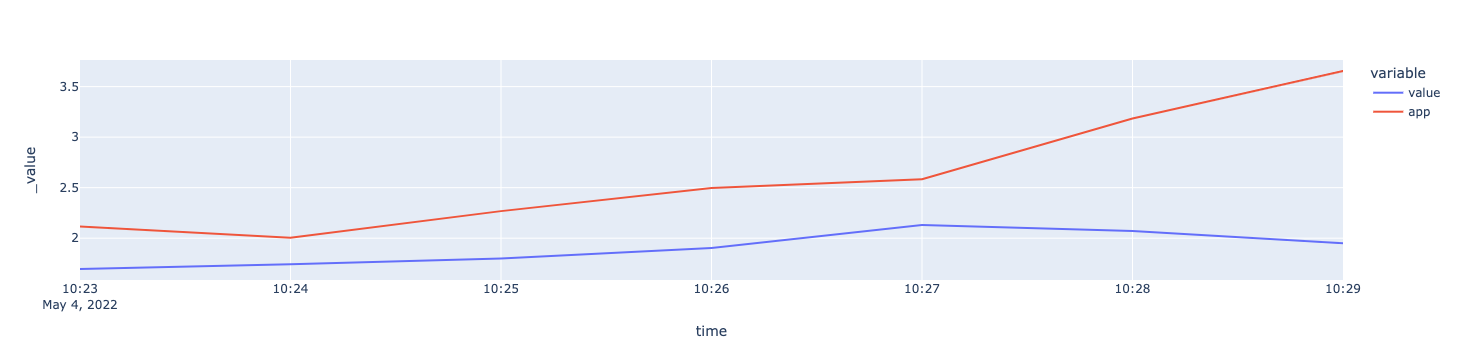

In [63]:
df_compare.plot()